In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from textwrap import wrap
def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im)
    im2[index] = im2[index] + e[index]
    return im2
def add_saltnpepper_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    return im2

def heightWidth(image):
    #width is the bigger one, the second one
    return image.shape[0], image.shape[1]

def shrink_corrupt_images(image, prop, varSigma):
    image = image/255
    image_G = add_gaussian_noise(image, prop, varSigma)
    image_S = add_saltnpepper_noise(image, prop)
    return image, image_G, image_S

def create_corrupt_titles(prop, varSigma, num):
    title1 = "Image " + str(num) +", original"
    title2 = "Image " + str(num) +" after corruption with Gaussian noise, " + str(int(100*prop)) + "% of the pixels altered with variance = " + str(varSigma)
    title3 = "Image " + str(num) +" after corruption with salt-n-pepper noise, " + str(int(100*prop)) + "% of the pixels altered"
    return title1, title2, title3

def create_denoise_titles(num, iterations, random):
    title1 = "Image " + str(num) +" after corruption with Gaussian noise and subsequent Gibbs denoising, with " + str(iterations) + " iterations"
    title2 = "Image " + str(num) +" after corruption with salt-n-pepper noise and subsequent Gibbs denoising, with " + str(iterations) + " iterations"
    if(random == True):
        title1 = title1 + ", using random sampling"
        title2 = title2 + ", using random sampling"
    return title1, title2

def display_three_images(image1, title1, image2, title2, image3, title3):    
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(131)
    ax1.set_title("\n".join(wrap(title1, 35)))
    ax1.axis('off')
    ax1.imshow(image1,cmap='gray')
    
    ax2 = fig.add_subplot(132)
    ax2.set_title("\n".join(wrap(title2, 35)))
    ax2.axis('off')
    ax2.imshow(image2,cmap='gray')
    
    ax3 = fig.add_subplot(133)
    ax3.set_title("\n".join(wrap(title3, 35)))
    ax3.axis('off')
    ax3.imshow(image3,cmap='gray')
    
    plt.show()
    
def save_three_images(image1, title1, image2, title2, image3, title3, fpath):    
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(131)
    ax1.set_title("\n".join(wrap(title1, 35)))
    ax1.axis('off')
    ax1.imshow(image1,cmap='gray')
    
    ax2 = fig.add_subplot(132)
    ax2.set_title("\n".join(wrap(title2, 35)))
    ax2.axis('off')
    ax2.imshow(image2,cmap='gray')
    
    ax3 = fig.add_subplot(133)
    ax3.set_title("\n".join(wrap(title3, 35)))
    ax3.axis('off')
    ax3.imshow(image3,cmap='gray')
    
    plt.savefig(fpath)

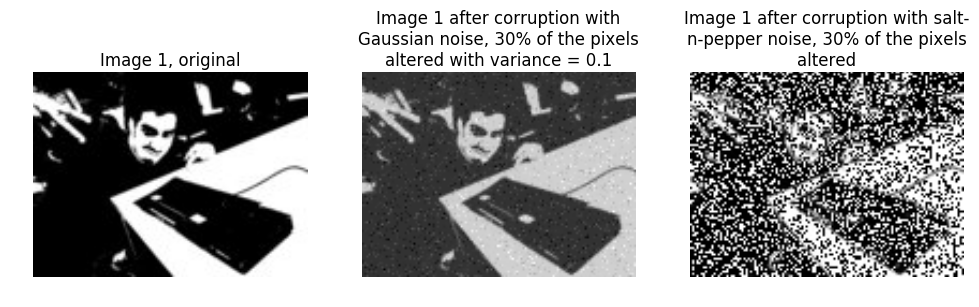

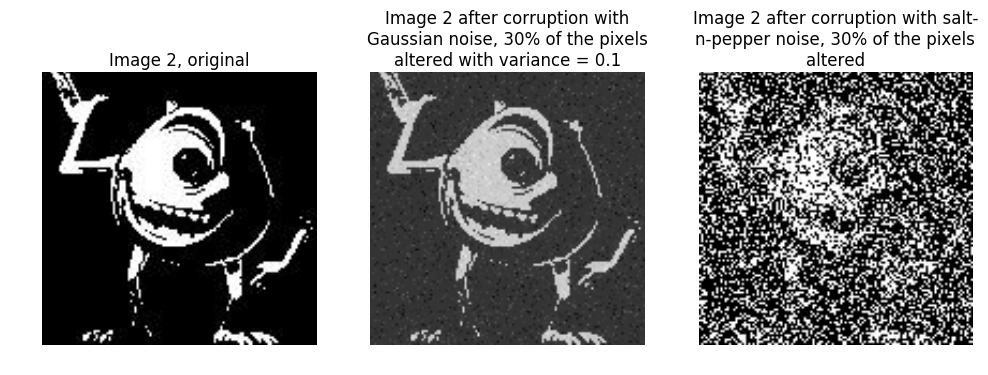

In [2]:
# proportion of pixels to alter
prop = 0.3
varSigma = 0.1

im1 = imread("../images/manan_grey_resize.jpg")
im1, im1_G, im1_S = shrink_corrupt_images(im1, prop, varSigma)
im1_title1, im1_title2, im1_title3 = create_corrupt_titles(prop, varSigma, 1)

im2 = imread("../images/mike_grey_resize.jpg")
im2, im2_G, im2_S = shrink_corrupt_images(im2, prop, varSigma)
im2_title1, im2_title2, im2_title3 = create_corrupt_titles(prop, varSigma, 2)

display_three_images(im1, im1_title1, im1_G, im1_title2, im1_S, im1_title3)
display_three_images(im2, im2_title1, im2_G, im2_title2, im2_S, im2_title3)

In [ ]:
def weights(image):
    return 1

def MF_Var_Bayes(image, lim):
    mu = 1
    X = np.copy(image)
    X[X > 0.5] = 1
    X[X <= 0.5] = -1
    
    H, W = heightWidth(image)
    
    ws = weights(image)
    
    for iteration in range(lim):
        for i in range(H):
            for j in range(W):
                ns = neighbours(i, j, H, W, 4)
                m = 0
                for n in ns:
                    m += 